In [23]:
# followed: https://medium.com/geekculture/time-series-forecast-in-python-5c4c61e1c2c2
#           https://github.com/raja-surya/Time-Series/blob/main/Time-Series-Google-Search-Python.ipynb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm



In [24]:
# import data
search_score = pd.read_csv('https://raw.githubusercontent.com/raja-surya/Time-Series/main/python_5years.csv', skiprows=1)
# print(f{search_score.dtypes})  # debugging

# rename worldwide rank column
search_score.rename(columns={'Python: (Worldwide)':'score'}, inplace=True)
# convert week dates to datetime
search_score['Week'] = pd.to_datetime(search_score['Week'])

# add breakout for further analysis
search_score['year'] = search_score.Week.dt.year
search_score['month'] = search_score.Week.dt.month
search_score['day'] = search_score.Week.dt.day
search_score

,Week,score,year,month,day
0,2016-07-10,26,2016,7,10
1,2016-07-17,30,2016,7,17
2,2016-07-24,24,2016,7,24
3,2016-07-31,22,2016,7,31
4,2016-08-07,21,2016,8,7
...,...,...,...,...,...
256,2021-06-06,86,2021,6,6
257,2021-06-13,75,2021,6,13
258,2021-06-20,79,2021,6,20
259,2021-06-27,75,2021,6,27


<AxesSubplot:xlabel='month'>

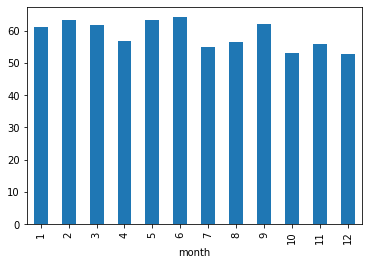

In [25]:
search_score.groupby('month').score.mean().plot.bar()

<AxesSubplot:xlabel='year'>

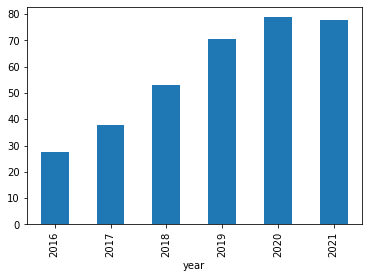

In [26]:
search_score.groupby('year').score.mean().plot.bar()

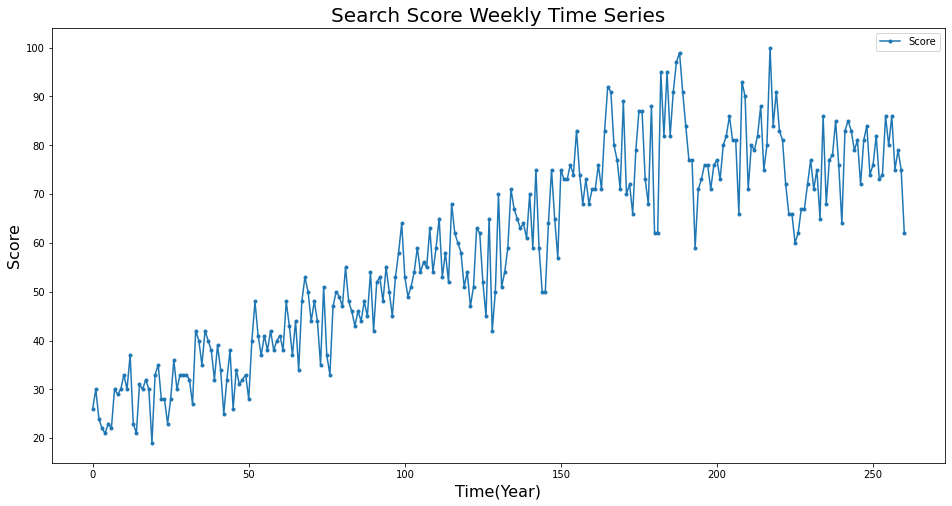

In [28]:
plt.figure(figsize=(16,8))

plt.plot(search_score['score'], ".-", label = 'Score')

plt.title('Search Score Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')